In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import BinaryCrossentropy
tf.compat.v1.enable_eager_execution()
print(tf.__version__)
print(tf.executing_eagerly())

2.9.1
True


In [2]:
train = tf.keras.utils.image_dataset_from_directory('train',validation_split=0.2, subset='training',seed=123,image_size=(48,48),batch_size=64,color_mode='grayscale',label_mode='categorical')
test = tf.keras.utils.image_dataset_from_directory('test',seed=123,image_size=(48,48),batch_size=64,color_mode='grayscale',label_mode='categorical')
val = tf.keras.utils.image_dataset_from_directory('train',validation_split=0.2, subset='validation',seed=123,image_size=(48,48),batch_size=64,color_mode='grayscale',label_mode='categorical')
#for entry in train:
#    entry[0][0] = entry[0][0] / 255

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 7178 files belonging to 7 classes.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [3]:
train.element_spec

(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))

In [4]:
#import tensorflow.compat.v1 as tfs
#tfs.disable_v2_behavior()
#def divide(x1, x2):
#    x2 = tfs.Session().run(x2)
#    x2 = tf.keras.utils.to_categorical(x2, num_classes=7)
#    return x1, x2
#train = train.map(divide)
#print(train.element_spec)

<class 'numpy.ndarray'> [0. 0. 1. 0. 0. 0. 0.]


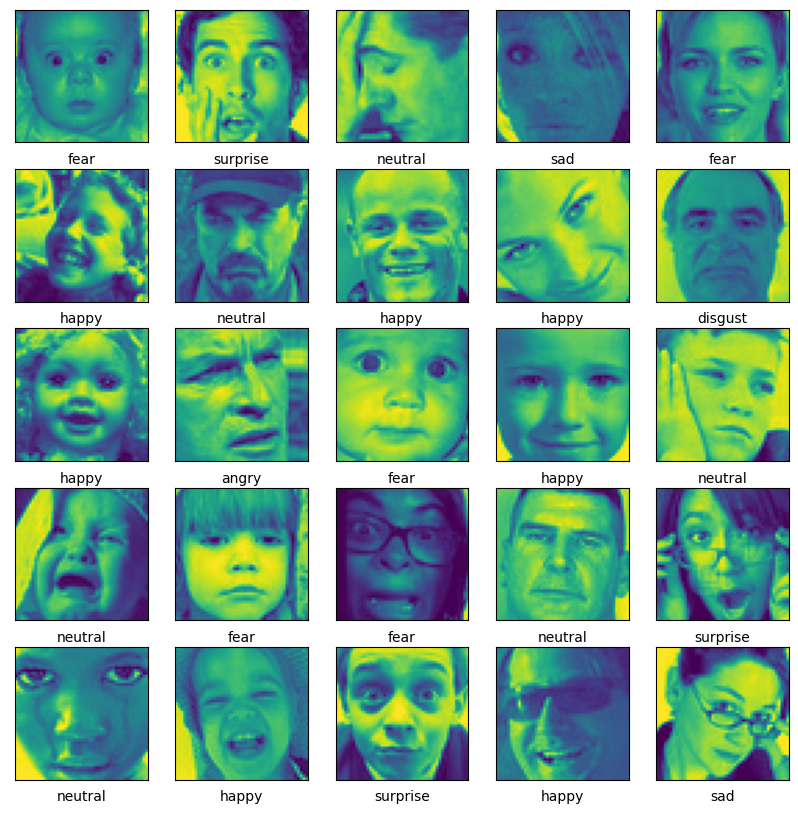

In [9]:
class_names={0:'angry',
            1:'disgust',
            2:'fear',
            3:'happy',
            4:'sad',
            5:'neutral',
            6:'surprise'
            }
a = train.take(5)
b = list(a.as_numpy_iterator())
plt.figure(figsize=(10,10))
print(type(b[0][1][0]),b[0][1][i])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(b[0][1][i])])
    plt.imshow(b[0][0][i])
plt.show()

In [10]:
import os 
import cv2 as cv

sample_size = 0
y = 0
training_x = []
training_y = []

for f in os.listdir("train/"):
    F = os.path.join("train",f)
    for file in os.listdir(F):
        if sample_size == 100:
            sample_size = 0
            y += 1
            break
        img = cv.imread(os.path.join(F,file),cv.IMREAD_GRAYSCALE)
        training_x.append(img)
        training_y.append(y)
        sample_size += 1

training_x = np.array(training_x).reshape(-1, 48, 48, 1)
training_x = training_x / 255
training_x = tf.random.shuffle(training_x,seed=123)
training_y = np.array(training_y)
training_y = tf.keras.utils.to_categorical(training_y, num_classes=7)
training_y = tf.random.shuffle(training_y,seed=123)
print(type(training_x),training_x.shape)
print(training_y)

<class 'tensorflow.python.framework.ops.EagerTensor'> (700, 48, 48, 1)
tf.Tensor(
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]], shape=(700, 7), dtype=float32)


In [11]:
#from tensorflow.keras.layers import LeakyReLU
 
model = models.Sequential()
model.add(layers.Conv2D(64,(5,5),input_shape=(48,48,1),strides=(2,2),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(256,(3,3),padding='same'))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3),strides=(2,2),padding='same',activation='relu'))
#model.add(layers.SpatialDropout2D(0.8))
model.add(layers.Flatten())
#model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(256,activation='relu',kernel_regularizer= regularizers.L2(l2=0.01)))
model.add(layers.Dense(128,activation='relu',kernel_regularizer= regularizers.L2(l2=0.01)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer= regularizers.L2(l2=0.01)))#layers.LeakyReLU(alpha=0.02)
#model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='linear'))


In [12]:
#model.summary()

In [13]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU') 
#for device in physical_devices:
#    tf.config.experimental.set_memory_growth(device, True)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print('ben')

ben


In [14]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#hist = model.fit(training_x,training_y,validation_split=0.2,epochs=100)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
hist = model.fit(train,epochs=100,validation_data=val)

Epoch 1/100
359/359 [==============================] - 11s 11ms/step - loss: 5.7574 - accuracy: 0.2372 - val_loss: 4.6965 - val_accuracy: 0.2986
Epoch 2/100
359/359 [==============================] - 3s 9ms/step - loss: 4.0637 - accuracy: 0.3034 - val_loss: 3.4827 - val_accuracy: 0.3585
Epoch 3/100
359/359 [==============================] - 3s 8ms/step - loss: 3.1716 - accuracy: 0.3501 - val_loss: 2.8620 - val_accuracy: 0.3914
Epoch 4/100
359/359 [==============================] - 3s 9ms/step - loss: 2.6923 - accuracy: 0.3784 - val_loss: 2.5248 - val_accuracy: 0.3954
Epoch 5/100
359/359 [==============================] - 3s 9ms/step - loss: 2.3976 - accuracy: 0.3953 - val_loss: 2.2944 - val_accuracy: 0.3963
Epoch 6/100
359/359 [==============================] - 3s 9ms/step - loss: 2.2025 - accuracy: 0.4125 - val_loss: 2.1241 - val_accuracy: 0.4170
Epoch 7/100
359/359 [==============================] - 3s 9ms/step - loss: 2.0589 - accuracy: 0.4265 - val_loss: 2.0130 - val_accuracy: 0.42

Epoch 58/100
359/359 [==============================] - 4s 10ms/step - loss: 0.4192 - accuracy: 0.9001 - val_loss: 3.0649 - val_accuracy: 0.4553
Epoch 59/100
359/359 [==============================] - 4s 11ms/step - loss: 0.4135 - accuracy: 0.9043 - val_loss: 3.0564 - val_accuracy: 0.4600
Epoch 60/100
359/359 [==============================] - 4s 11ms/step - loss: 0.3987 - accuracy: 0.9077 - val_loss: 3.2071 - val_accuracy: 0.4489
Epoch 61/100
359/359 [==============================] - 4s 10ms/step - loss: 0.3889 - accuracy: 0.9097 - val_loss: 3.3402 - val_accuracy: 0.4423
Epoch 62/100
359/359 [==============================] - 4s 11ms/step - loss: 0.3780 - accuracy: 0.9136 - val_loss: 3.4783 - val_accuracy: 0.4470
Epoch 63/100
359/359 [==============================] - 4s 11ms/step - loss: 0.3808 - accuracy: 0.9114 - val_loss: 3.2809 - val_accuracy: 0.4652
Epoch 64/100
359/359 [==============================] - 4s 11ms/step - loss: 0.3660 - accuracy: 0.9158 - val_loss: 3.4446 - val_ac

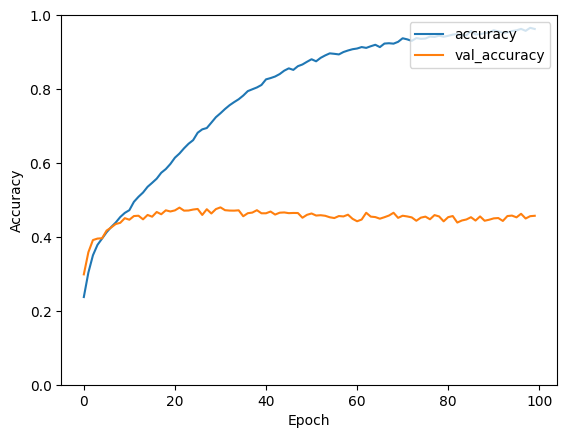

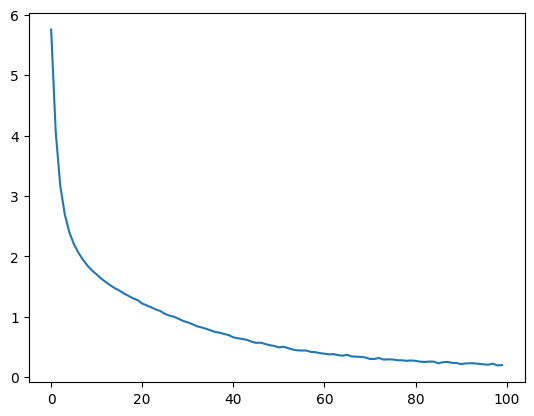

In [15]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()
plt.plot(hist.history['loss'],label='loss')



(48, 48)


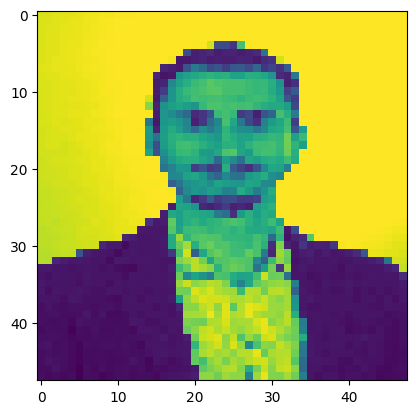

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("C:/Users/acuzum/MLScratchCodes/sunnyML/acu.jpg")
img_res = cv.resize(img,(48,48),cv.INTER_AREA)
cv.imwrite("C:/Users/acuzum/MLScratchCodes/sunnyML/acu_s.jpg",img_res)

img_res = cv.cvtColor(img_res,cv.COLOR_RGB2GRAY);
plt.imshow(img_res)
print(img_res.shape)

In [17]:
loss = model.evaluate(test, steps=112)

112/112 [==============================] - 1s 9ms/step - loss: 4.3435 - accuracy: 0.4625


In [ ]:
loss

In [ ]:
pred = model.predict(img_res.reshape(1,48,48,1))

In [ ]:
print(pred)
np.argmax(pred)